In [1]:
#pip install -U langgraph langsmith langchain_anthropic
import ipywidgets as widgets
from IPython.display import display, clear_output

#I DON'T REMEMBER IF THIS CODE IS WORKING AT ALL

In [2]:
#set environment key if not there 
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("ANTHROPIC_API_KEY")

In [3]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
from langchain_anthropic import ChatAnthropic

llm = ChatAnthropic(model="claude-3-5-sonnet-20240620")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [5]:
#add a entry point
graph_builder.add_edge(START, "chatbot")

#add an exit point

graph_builder.add_edge("chatbot", END)

In [6]:
#compile the graph

graph = graph_builder.compile()

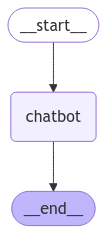

In [7]:
#to see the graph

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Now let's run the chatbot!

Tip: You can exit the chat loop at any time by typing "quit", "exit", or "q".

In [ ]:
#OPTION 1 -quick hard coded test

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)



#hardcode query
user_input = "can you tell me the current weather in -{choose local place]"
print("User:", user_input)
stream_graph_updates(user_input)

User: can you tell me the current weather in Jandaia goias
Assistant: I apologize, but I don't have access to real-time weather information. As an AI language model, I don't have the ability to fetch current weather data. To get the most up-to-date and accurate weather information for Jandaia, Goiás, Brazil, I recommend you:

1. Check a reliable weather website or app
2. Use a search engine and look for "weather in Jandaia Goiás"
3. Check the official website of the Brazilian National Institute of Meteorology (INMET)
4. Use a weather app on your smartphone

These sources will provide you with the current weather conditions, temperature, humidity, and forecast for Jandaia, Goiás.


In [ ]:
#OPTION  -WITH WIDGETS

# Your original function
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

# Callback for when the button is clicked
def on_button_click(b):
    # Clear previous output to avoid clutter
    clear_output(wait=True)
    # Get the input text
    user_input = text_input.value
    # Print user input so it looks like a chat
    print("User:", user_input)
    # Call your function to stream updates
    stream_graph_updates(user_input)
    # Redisplay the widgets so they remain visible after clearing output
    display(text_input, button)

# Create a text input widget
text_input = widgets.Text(
    placeholder='Enter your message here',
    description='User:',
    disabled=False
)

# Create a button widget
button = widgets.Button(
    description='Send',
    disabled=False,
    button_style='',  # You can set this to 'success', 'info', etc.
    tooltip='Click to send your message'
)

# Link the button click to the callback function
button.on_click(on_button_click)

# Display the widgets
display(text_input, button)


User: what do you know about flowers
Assistant: I know quite a bit about flowers! Here are some key points:

1. Flowers are the reproductive structures of flowering plants (angiosperms).

2. They typically consist of four main parts: sepals, petals, stamens, and pistils.

3. Flowers come in a wide variety of colors, shapes, and sizes.

4. They play a crucial role in plant reproduction through pollination.

5. Many flowers attract pollinators like bees, butterflies, and birds with their colors, scents, and nectar.

6. Flowers have been used symbolically in art, literature, and cultural traditions for centuries.

7. Some common types of flowers include roses, tulips, daisies, sunflowers, and orchids.

8. Flowers can be annual (completing their life cycle in one year), biennial (two years), or perennial (living for multiple years).

9. Some flowers have medicinal properties and are used in traditional and modern medicine.

10. The study of flowers is called floristry or botany (when study

Text(value='what do you know about flowers', description='User:', placeholder='Enter your message here')

Button(description='Send', style=ButtonStyle(), tooltip='Click to send your message')